In [1]:
# Importação dos pacotes
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import matplotlib.pyplot as plt # visualização gráfica

In [3]:
# Abrindo o arquivo com os dados brutos
df = pd.read_csv("df_atualizado.csv", index_col=0)
print(df.head())

        faixa.ano situacao.final operou.12.meses.final estado.civil.agrupado  \
genero                                                                         
F       2002_2015              D                     N                 outro   
M       2002_2015              D                     N  casado.uniao.estavel   
M       2002_2015              A                     N   separado.divorciado   
M       2002_2015              A                     S   separado.divorciado   
M       2002_2015              D                     N   separado.divorciado   

                          profissao.categoria  faixa.etaria    regiao  
genero                                                                 
F       Direito_Seguranca_e_servicos_publicos  44_anos_mais  nordeste  
M            Tecnologia_Engenharia_e_Producao  44_anos_mais   sudeste  
M            Tecnologia_Engenharia_e_Producao  35_a_44_anos  nordeste  
M                                       Saude  44_anos_mais   sudeste  
M      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31883794 entries, F to F
Data columns (total 7 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   faixa.ano              object
 1   situacao.final         object
 2   operou.12.meses.final  object
 3   estado.civil.agrupado  object
 4   profissao.categoria    object
 5   faixa.etaria           object
 6   regiao                 object
dtypes: object(7)
memory usage: 1.9+ GB


In [5]:
# Filtra apenas as linhas onde situacao_final é "A"
df = df[df["situacao.final"] == "A"]

## Operou nos últimos 12 meses

In [6]:
contagem_operou_12_meses_final = df["operou.12.meses.final"].value_counts()
percentual_operou_12_meses_final = df["operou.12.meses.final"].value_counts(normalize=True) * 100

# Juntando contagem e percentual em um DataFrame
resultado_operou_12_meses_final = pd.DataFrame({
    "Contagem": contagem_operou_12_meses_final,
    "Percentual (%)": percentual_operou_12_meses_final.round(2)
})

resultado_operou_12_meses_final

,Contagem,Percentual (%)
operou.12.meses.final,,
N,24948613,90.22
S,2703278,9.78


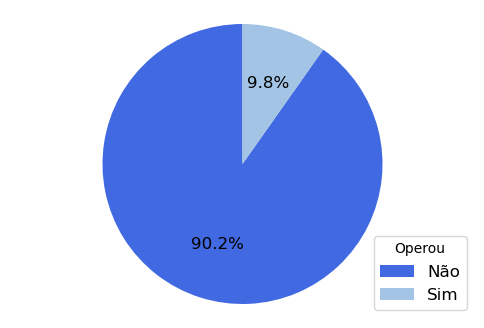

In [7]:
# Labels e dados
labels = ['Não', 'Sim']
sizes = resultado_operou_12_meses_final["Contagem"]

# Gráfico de pizza com percentuais dentro e sem rótulos sobre a pizza
plt.figure(figsize=(6, 4))
plt.pie(
    sizes,
    labels=None,             # remove rótulos das fatias
    autopct='%1.1f%%',       # percentuais dentro da pizza
    startangle=90,
    colors=['royalblue', "#a3c4e4"],
    textprops={'fontsize': 12}
)
plt.axis('equal')  # Deixa o gráfico circular

# Legenda separada apenas no canto inferior direito
plt.legend(labels, title="Operou", loc='lower right', fontsize=12)

plt.show()

## Faixa Ano

In [8]:
# Contagem Faixa Ano
contagem_faixa_ano = df["faixa.ano"].value_counts()
percentual_faixa_ano = df["faixa.ano"].value_counts(normalize=True) * 100

# Juntando contagem e percentual em um DataFrame
resultado_faixa_ano = pd.DataFrame({
    "Contagem": contagem_faixa_ano,
    "Percentual (%)": percentual_faixa_ano.round(2)
})

resultado_faixa_ano

,Contagem,Percentual (%)
faixa.ano,,
2021_2025,21471127,77.65
2016_2020,5700669,20.62
2002_2015,480095,1.74


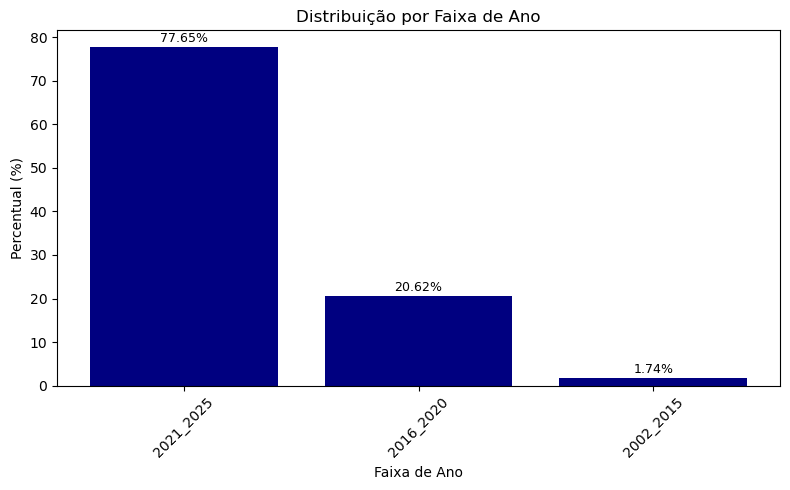

In [9]:
# Plotando o gráfico de barras Faixa Ano
plt.figure(figsize=(8, 5))
plt.bar(resultado_faixa_ano.index, resultado_faixa_ano["Percentual (%)"], color='#000080')  # Azul marinho

# Adicionando título e rótulos
plt.title("Distribuição por Faixa de Ano")
plt.xlabel("Faixa de Ano")
plt.ylabel("Percentual (%)")

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Adicionando os valores acima das barras
for i, valor in enumerate(resultado_faixa_ano["Percentual (%)"]):
    plt.text(i, valor + 0.5, f'{valor:.2f}%', ha='center', va='bottom', fontsize=9)

# Exibir gráfico
plt.tight_layout()
plt.show()

## Estado Civil

In [10]:
# Contagem Estado Civil
contagem_estado_civil_agrupado = df["estado.civil.agrupado"].value_counts()
percentual_estado_civil_agrupado = df["estado.civil.agrupado"].value_counts(normalize=True) * 100

# Juntando contagem e percentual em um DataFrame
resultado_estado_civil_agrupado = pd.DataFrame({
    "Contagem": contagem_estado_civil_agrupado,
    "Percentual (%)": percentual_estado_civil_agrupado.round(2)
})

resultado_estado_civil_agrupado

,Contagem,Percentual (%)
estado.civil.agrupado,,
solteiro,17792914,64.35
separado.divorciado,8748890,31.64
casado.uniao.estavel,813743,2.94
outro,296344,1.07


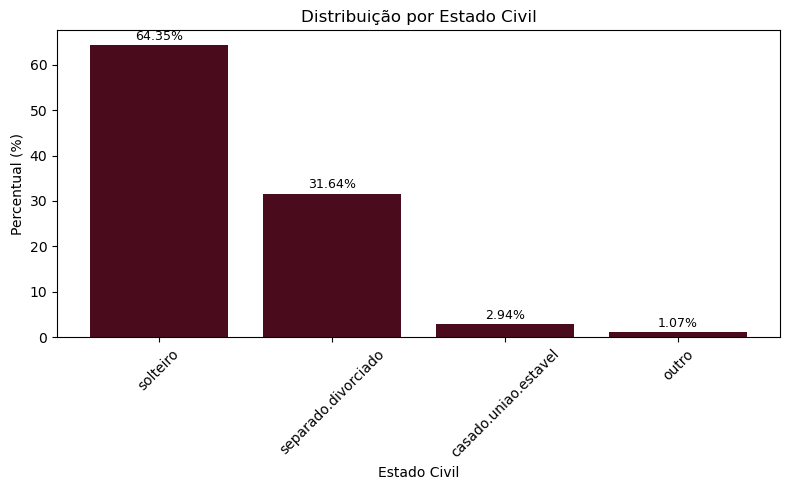

In [12]:
# # Plotando o gráfico de barras Estado Civil
plt.figure(figsize=(8, 5))
plt.bar(resultado_estado_civil_agrupado.index, resultado_estado_civil_agrupado["Percentual (%)"], color="#4A0B1D")

# Adicionando título e rótulos
plt.title("Distribuição por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Percentual (%)")

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Adicionando os valores acima das barras
for i, valor in enumerate(resultado_estado_civil_agrupado["Percentual (%)"]):
    plt.text(i, valor + 0.5, f'{valor:.2f}%', ha='center', va='bottom', fontsize=9)

# Exibir gráfico
plt.tight_layout()
plt.show()

## Profissão

In [13]:
# Contagem Profissão
contagem_profissao_categoria = df["profissao.categoria"].value_counts()
percentual_profissao_categoria = df["profissao.categoria"].value_counts(normalize=True) * 100

# Juntando contagem e percentual em um DataFrame
resultado_profissao_categoria = pd.DataFrame({
    "Contagem": contagem_profissao_categoria,
    "Percentual (%)": percentual_profissao_categoria.round(2)
})

resultado_profissao_categoria

,Contagem,Percentual (%)
profissao.categoria,,
Outros,9533023,34.48
Administracao_Negocios_e_Contabilidade,6717402,24.29
Servicos_Gerais_e_Atendimento,2516220,9.10
Educacao_Pesquisa_e_Ciencias,2379500,8.61
Industria_Construcao_e_Transporte,1710243,6.18
Direito_Seguranca_e_servicos_publicos,1590976,5.75
Tecnologia_Engenharia_e_Producao,1301575,4.71
Saude,1033308,3.74
Comunicacao_artes_e_midia,650433,2.35


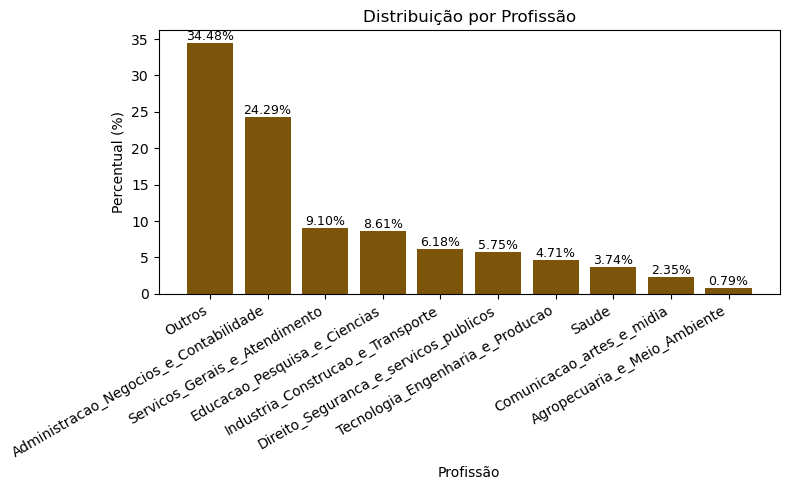

In [14]:
# Plotando gráfico de barras Profissão
plt.figure(figsize=(8, 5))
x_labels = resultado_profissao_categoria.index
y_values = resultado_profissao_categoria["Percentual (%)"]

# Desenha o gráfico
plt.bar(x_labels, y_values, color="#7C540A")

# Título e rótulos
plt.title("Distribuição por Profissão")
plt.xlabel("Profissão")
plt.ylabel("Percentual (%)")

# Rótulos legíveis no eixo X
plt.xticks(rotation=30, ha='right')

# Adiciona os valores acima das barras
for x, y in zip(x_labels, y_values):
    plt.text(x, y + 0.0, f'{y:.2f}%', ha='center', va='bottom', fontsize=9)

# Layout bonito
plt.tight_layout()
plt.show()

## Faixa Etária

In [15]:
# Contagem Profissão
contagem_faixa_etaria = df["faixa.etaria"].value_counts()
percentual_faixa_etaria = df["faixa.etaria"].value_counts(normalize=True) * 100

# Juntando contagem e percentual em um DataFrame
resultado_faixa_etaria = pd.DataFrame({
    "Contagem": contagem_faixa_etaria,
    "Percentual (%)": percentual_faixa_etaria.round(2)
})

resultado_faixa_etaria

,Contagem,Percentual (%)
faixa.etaria,,
25_a_34_anos,9117241,32.97
35_a_44_anos,7035728,25.44
44_anos_mais,6184994,22.37
ate_24_anos,5313928,19.22


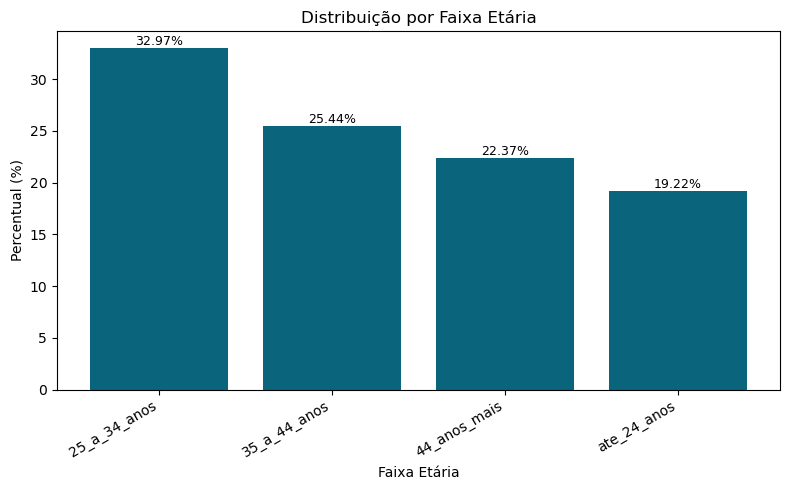

In [17]:
# Plotando gráfico de barras Faixa Etária
plt.figure(figsize=(8, 5))
x_labels = resultado_faixa_etaria.index
y_values = resultado_faixa_etaria["Percentual (%)"]

# Desenha o gráfico
plt.bar(x_labels, y_values, color="#0A657C")

# Título e rótulos
plt.title("Distribuição por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Percentual (%)")

# Rótulos legíveis no eixo X
plt.xticks(rotation=30, ha='right')

# Adiciona os valores acima das barras
for x, y in zip(x_labels, y_values):
    plt.text(x, y + 0.0, f'{y:.2f}%', ha='center', va='bottom', fontsize=9)

# Layout bonito
plt.tight_layout()
plt.show()

## Região

In [18]:
# Contagem Profissão
contagem_regiao = df["regiao"].value_counts()
percentual_regiao = df["regiao"].value_counts(normalize=True) * 100

# Juntando contagem e percentual em um DataFrame
resultado_regiao = pd.DataFrame({
    "Contagem": contagem_regiao,
    "Percentual (%)": percentual_regiao.round(2)
})

resultado_regiao

,Contagem,Percentual (%)
regiao,,
sudeste,14226127,51.45
nordeste,5069355,18.33
sul,4146816,15.00
centro_oeste,2476216,8.95
norte,1733377,6.27


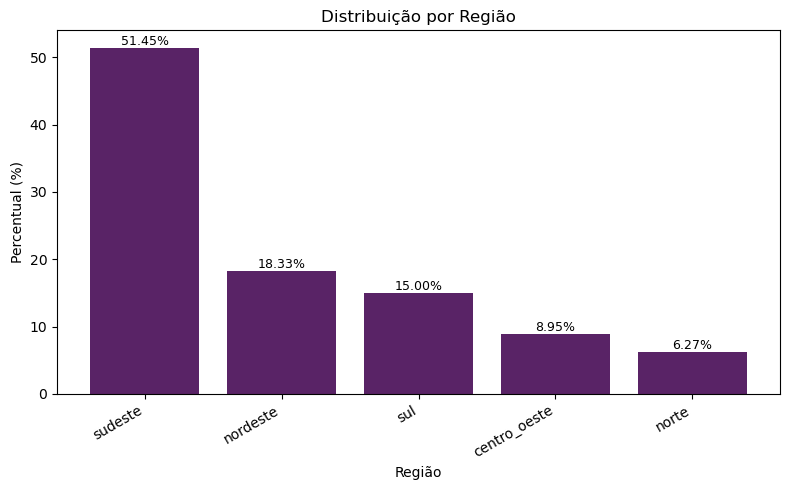

In [20]:
# Plotando gráfico de barras Região
plt.figure(figsize=(8, 5))
x_labels = resultado_regiao.index
y_values = resultado_regiao["Percentual (%)"]

# Desenha o gráfico
plt.bar(x_labels, y_values, color="#592366")

# Título e rótulos
plt.title("Distribuição por Região")
plt.xlabel("Região")
plt.ylabel("Percentual (%)")

# Rótulos legíveis no eixo X
plt.xticks(rotation=30, ha='right')

# Adiciona os valores acima das barras
for x, y in zip(x_labels, y_values):
    plt.text(x, y + 0.0, f'{y:.2f}%', ha='center', va='bottom', fontsize=9)

# Layout bonito
plt.tight_layout()
plt.show()